<a href="https://colab.research.google.com/github/codingbjs/DeepLearning/blob/main/Deep_Neural_Network_DNN/DNN_mnist_Categorical_Classification_Overfitting_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!nvidia-smi

Wed Oct 11 04:20:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    30W /  70W |    359MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(len(X_train))
print(X_train.shape)
print()
print(len(y_train))
print(y_train[0:5])


60000
(60000, 28, 28)

60000
[5 0 4 1 9]


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [ ]:
print(len(X_test))
print(X_test.shape)
print()
print(len(y_test))
print(y_test[0:5])


10000
(10000, 28, 28)

10000
[7 2 1 0 4]


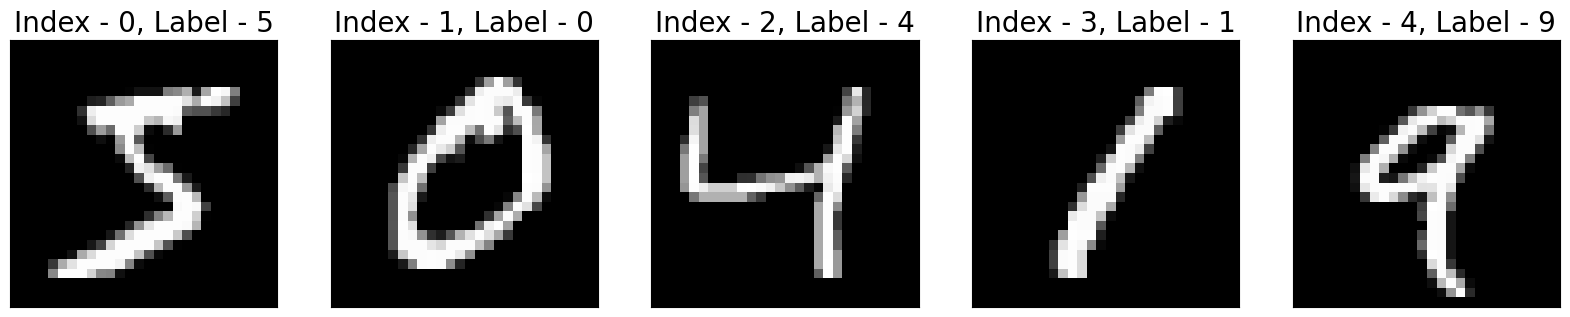

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 4))
for idx in range(5):
    label = y_train[idx]
    plt.subplot(1, 5, idx + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[idx], cmap = 'gray')
    plt.title('Index - %d, Label - %d' % (idx, label), fontsize = 20)
plt.show()

In [ ]:
import numpy as np
np.set_printoptions(linewidth = 150, precision = 2)
print(X_train[4])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

In [ ]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255
print(X_train[4])


[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]

In [ ]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))
X_train.shape, X_test.shape


((60000, 784), (10000, 784))

In [ ]:
print(28*28)

784


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape


((38400, 784), (38400, 10), (9600, 784), (9600, 10))

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))


In [ ]:
mnist.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])


In [ ]:
%%time
Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))


Epoch 1/100
300/300 [==============================] - 6s 4ms/step - loss: 0.2920 - accuracy: 0.9110 - val_loss: 0.1511 - val_accuracy: 0.9547
Epoch 2/100
300/300 [==============================] - 1s 3ms/step - loss: 0.1053 - accuracy: 0.9677 - val_loss: 0.1089 - val_accuracy: 0.9666
Epoch 3/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0633 - accuracy: 0.9800 - val_loss: 0.0998 - val_accuracy: 0.9698
Epoch 4/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0442 - accuracy: 0.9861 - val_loss: 0.0928 - val_accuracy: 0.9749
Epoch 5/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0318 - accuracy: 0.9895 - val_loss: 0.0864 - val_accuracy: 0.9758
Epoch 6/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0209 - accuracy: 0.9934 - val_loss: 0.1045 - val_accuracy: 0.9725
Epoch 7/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0168 - accuracy: 0.9944 - val_loss: 0.1080 - val_accuracy: 0.9745

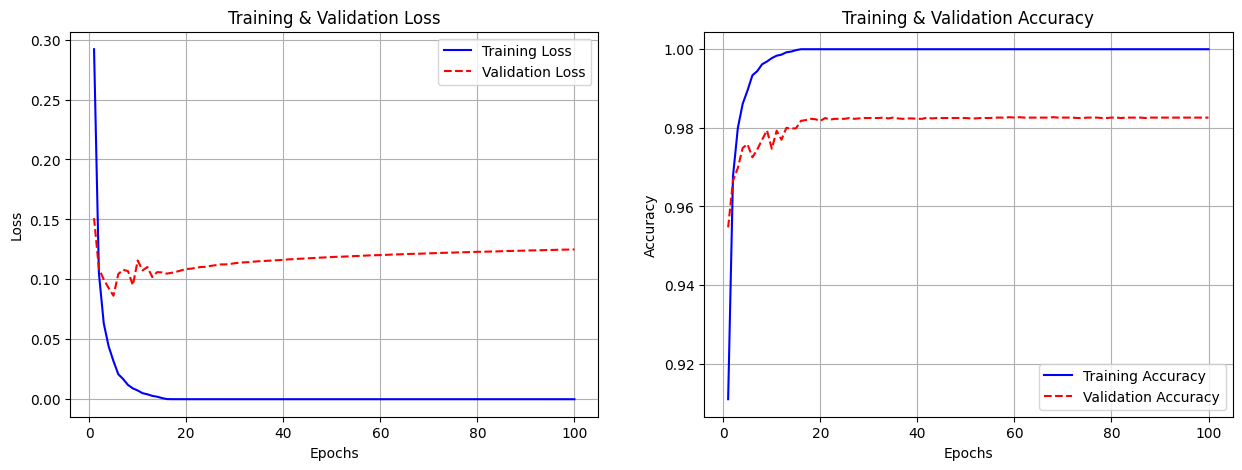

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(Hist_mnist.history['loss']) + 1)
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_mnist.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_mnist.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()


In [ ]:
loss, accuracy = mnist.evaluate(X_test, y_test, verbose = 0)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))


Loss = 0.10513
Accuracy = 0.98400


In [ ]:
np.set_printoptions(suppress = True, precision = 9)
print(mnist.predict(X_test[:1,:], verbose = 0))


[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [ ]:
print(np.argmax(mnist.predict(X_test[:1,:], verbose = 0)))

7


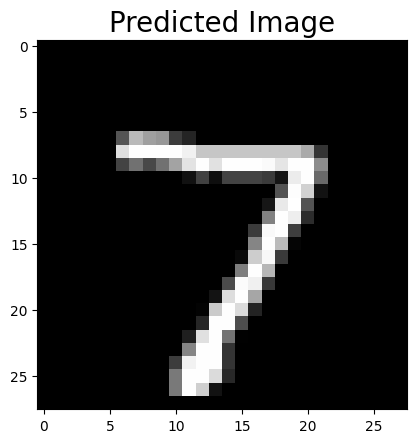

In [ ]:
plt.imshow(X_test[0].reshape(28, 28), cmap = 'gray')
plt.title('Predicted Image', fontsize = 20)
plt.show()


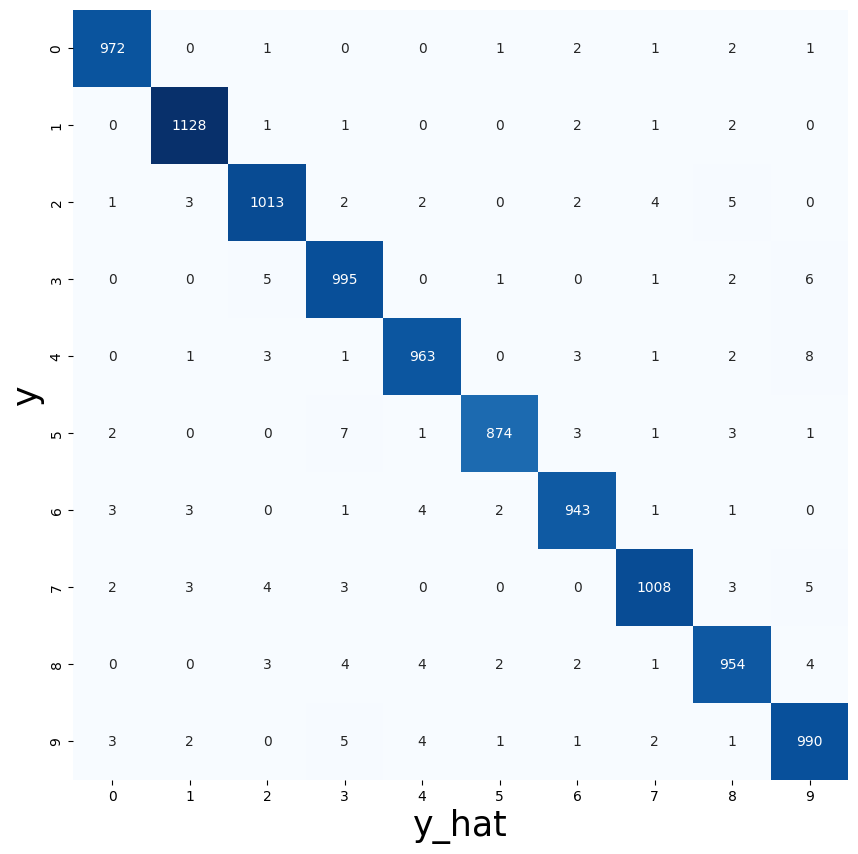

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

CM = confusion_matrix(np.argmax(y_test, axis = 1),
                      np.argmax(mnist.predict(X_test, verbose = 0), axis = 1))
plt.figure(figsize = (10, 10))
sns.heatmap(CM,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            cbar = False)

plt.xlabel('y_hat', fontsize = 25)
plt.ylabel('y', fontsize = 25)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print('\n',
      classification_report(np.argmax(y_test, axis = 1),
                            np.argmax(mnist.predict(X_test, verbose = 0), axis = 1)))


               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.99       892
           6       0.98      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

